# <p style="background-color:white  ; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Salary Range Prediction
</p>

<div style="border-radius:10px; padding: 15px; background-color:white ; font-size:120%; text-align:left">

<h3 align="left"><font color=brown>project aim:</font></h3>

<h3 align="left"><font color=black> This project aims to leverage historical job data provided by our partners to predict both minimum and maximum salary ranges accurately for a given posting.
</font></h3>

<h2 align="left"><font color=brown>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split ,GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [2]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark| grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

<a id="read"></a>
# <p style="background-color:white ; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color:white ; font-size:115%; color:brown; text-align:left">

First of all, let's load the dataset:

In [3]:
df = pd.read_csv("Jobs_NYC_Postings.csv")
df

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,570670,DEPT OF HEALTH/MENTAL HYGIENE,External,1,Public Health Nurse III / Communicable Disease...,PUBLIC HEALTH NURSE,Competitive-1,51011,03,Constituent Services & Community Programs Health,...,"**Must follow all safety, security, Blood-born...",Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City Residency is not required for th...,01/24/2023,NaN,11/16/2023,03/04/2024
5116,552517,DEPARTMENT OF TRANSPORTATION,External,1,Engineer-In-Charge,CIVIL ENGINEER,Competitive-1,20215,02,"Engineering, Architecture, & Planning",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,35 Hours,55 Water St Ny Ny,NaN,New York City Residency is not required for th...,09/23/2022,NaN,09/29/2022,03/04/2024
5117,567353,DEPARTMENT OF CORRECTION,External,8,"Assistant Commissioner, Facility Operations",FACILITY SUPERVISOR (CORRECTIO,Non-Competitive-5,95090,M4,"Public Safety, Inspections, & Enforcement",...,The City of New York offers a comprehensive be...,For City employees: Go to Employee Self-Servic...,NaN,NaN,NaN,New York City residency is generally required ...,01/05/2023,NaN,01/26/2023,03/04/2024
5118,612424,BRONX DISTRICT ATTORNEY,Internal,1,Human Trafficking Victim's Advocate,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Constituent Services & Community Programs Heal...,...,NaN,"For City employees, to complete your applicati...",NaN,NaN,NaN,City Residency is not required for this position,10/20/2023,19-OCT-2024,10/20/2023,03/04/2024


In [4]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


<a id="overview"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview and Data Cleaning</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="basic"></a>
# <b><span style='color:white'>Step 3.1 |</span><span style='color:brown'> Dataset Basic Information</span></b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

<a id="num_statistics"></a>
# <b><span style='color:white'>Step 3.2 |</span><span style='color:brown'> Summary Statistics for Numerical Variables</span></b>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Job ID,5120.0,598721.366211,28274.636161,469953.0,586358.0,607060.0,621404.0,628806.0
# Of Positions,5120.0,2.070898,5.799227,1.0,1.0,1.0,1.0,150.0
Salary Range From,5120.0,64625.224123,31378.516179,0.0,51869.0,62397.0,80557.0,225000.0
Salary Range To,5120.0,89978.575734,46732.299939,15.0,64608.0,85147.0,113550.0,252165.0
Recruitment Contact,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="cat_statistics"></a>
# <b><span style='color:white'>Step 3.3 |</span><span style='color:brown'> Summary Statistics for Categorical  Variables</span></b>

In [7]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,Agency,Posting Type,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Career Level,...,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
count,5120,5120,5120,5120,5120,5120,5120,5120,5003,5120,...,3901,3258,4694,1910,1891,5120,5120,1504,5120,5120
unique,59,2,1781,365,5,388,18,183,2,5,...,1639,780,1332,315,268,80,448,158,404,1
top,DEPT OF ENVIRONMENT PROTECTION,Internal,Project Manager,COMMUNITY COORDINATOR,Competitive-1,56058,00,"Engineering, Architecture, & Planning",F,Experienced (non-manager),...,â¢ Experience with Welfare Management System ...,Authorization to work in the United States is ...,Click the Apply Now button.,35 Hours,55 Water St Ny Ny,New York City residency is generally required ...,09/29/2023,13-MAR-2024,02/27/2024,03/04/2024
freq,932,2612,63,269,3334,269,2107,785,4841,3846,...,28,120,170,299,204,2789,94,78,122,5120


<a id="num_statistics"></a>
# <b><span style='color:white'>Step 3.4 |</span><span style='color:brown'> Drop Unnecessary Columns</span></b>

In [8]:
# Columns to drop
drop_columns = [
    'Job ID',            
    'Agency',            
    'Posting Type',      
    'Division/Work Unit',
    'Additional Information', 
    'To Apply',          
    'Recruitment Contact', 
    'Posting Date',      
   'Post Until',        
    'Posting Updated',   
    'Process Date'       
]

# Drop 
data = df.drop(columns=drop_columns, errors='ignore')

print("Columns after dropping unnecessary ones:", data.columns)


Columns after dropping unnecessary ones: Index(['# Of Positions', 'Business Title', 'Civil Service Title',
       'Title Classification', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Career Level', 'Salary Range From',
       'Salary Range To', 'Salary Frequency', 'Work Location',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Hours/Shift', 'Work Location 1', 'Residency Requirement'],
      dtype='object')


In [9]:
data

,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Job Description,Minimum Qual Requirements,Preferred Skills,Hours/Shift,Work Location 1,Residency Requirement
0,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,F,Experienced (non-manager),82506.0,94882.0,Annual,42-09 28th Street,"Established in 1805, the New York City Departm...","1. For Assignment Level I (only physical, bio...",Experience in quantitative research methods an...,NaN,NaN,New York City residency is generally required ...
1,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",F,Experienced (non-manager),58682.0,134570.0,Annual,30-30 Thomson Ave L I City Qns,Hours: Full-Time â 35 Hours Work Location: 3...,1. A baccalaureate degree from an accredited c...,Candidates must have excellent management skil...,35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",New York City Residency is not required for th...
2,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",F,Experienced (non-manager),58682.0,91405.0,Annual,30-30 Thomson Ave L I City Qns,Hours: Full-Time â 35 Hours Work Location: 3...,1. A baccalaureate degree from an accredited c...,Candidates should have at least six years of e...,NaN,NaN,New York City Residency is not required for th...
3,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",F,Experienced (non-manager),50972.0,82730.0,Annual,55 Water St Ny Ny,Reporting directly to the Director of Bridge R...,1. A baccalaureate degree from an accredited c...,Familiar with and knowledge of Procurement sys...,9:00am â 5:00pm,To be determine.,New York City residency is generally required ...
4,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,F,Experienced (non-manager),92301.0,106146.0,Annual,42-09 28th Street,"Established in 1805, the New York City Departm...","1. For Assignment Level I (only physical, bio...",At least five yearsâ work experience in the ...,NaN,NaN,New York City residency is generally required ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,1,Public Health Nurse III / Communicable Disease...,PUBLIC HEALTH NURSE,Competitive-1,51011,03,Constituent Services & Community Programs Health,F,Experienced (non-manager),84252.0,84252.0,Annual,30-30 47TH AVE,*** OPEN TO APPLICANTS WHO ARE PERMANENT IN TH...,1. A Bachelorâs of Science degree in Nursing...,Expertise in Planning and Program Development....,NaN,NaN,New York City Residency is not required for th...
5116,1,Engineer-In-Charge,CIVIL ENGINEER,Competitive-1,20215,02,"Engineering, Architecture, & Planning",F,Experienced (non-manager),80557.0,111917.0,Annual,55 Water St Ny Ny,This position is for Engineer-In-Charge servin...,"(1) Four (4) years of full-time, satisfactory ...",Ability to communicate effectively in verbal a...,35 Hours,55 Water St Ny Ny,New York City Residency is not required for th...
5117,8,"Assistant Commissioner, Facility Operations",FACILITY SUPERVISOR (CORRECTIO,Non-Competitive-5,95090,M4,"Public Safety, Inspections, & Enforcement",F,Executive,201587.0,201587.0,Annual,"Hazen St-A.M.K.C., E. Elm, Ny",The New York City Department of Correction (DO...,1.\tA Bachelorâs Degree from an accredited c...,â¢\tAt least ten (10) years of professional s...,NaN,NaN,New York City residency is generally required ...
5118,1,Human Trafficking Victim's Advocate,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Constituent Services & Community Programs Heal...,F,Experienced (non-manager),67983.0,67983.0,An

<a id="cat_statistics"></a>
# <b><span style='color:white'>Step 3.5 |</span><span style='color:brown'> Handle Missing Values</span></b>

In [10]:
data.isnull().sum()

# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     117
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Job Description                     0
Minimum Qual Requirements          43
Preferred Skills                 1219
Hours/Shift                      3210
Work Location 1                  3229
Residency Requirement               0
dtype: int64

In [11]:
# Fill missing values for categorical columns with "Unknown"
categorical_cols = ['Job Category', 'Full-Time/Part-Time indicator', 'Career Level']
for col in categorical_cols:
    mode_value = data[col].mode()[0]  # Get the mode of the column
    data[col].fillna(mode_value, inplace=True)

# Fill missing values for salary columns with the mean
data['Salary Range From'] = pd.to_numeric(data['Salary Range From'], errors='coerce')
data['Salary Range To'] = pd.to_numeric(data['Salary Range To'], errors='coerce')
data['Salary Range From'].fillna(data['Salary Range From'].mean(), inplace=True)
data['Salary Range To'].fillna(data['Salary Range To'].mean(), inplace=True)


C:\Users\DEVARSHI\AppData\Local\Temp\ipykernel_6376\2859866372.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)
C:\Users\DEVARSHI\AppData\Local\Temp\ipykernel_6376\2859866372.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

## Identify Non-Numeric Entries

In [12]:
# Check the unique values in each column to locate any non-numeric entries
print(data['Salary Range From'].unique())
print(data['Salary Range To'].unique())
print(data['Level'].unique())

[8.250600e+04 5.868200e+04 5.097200e+04 9.230100e+04 1.400000e+05
 5.631300e+04 4.817000e+04 2.292670e+01 9.328800e+04 2.982400e+02
 4.631800e+04 6.152000e+01 1.545000e+01 4.188700e+04 6.247000e+04
 5.186900e+04 1.500000e+01 3.976300e+04 7.477300e+04 7.404100e+04
 5.667700e+04 4.741800e+04 6.413700e+04 4.519300e+04 7.700000e+04
 4.670390e+01 5.911600e+04 7.887100e+04 7.200000e+04 6.492200e+04
 1.100000e+05 8.636800e+04 9.847000e+04 7.962000e+04 3.639000e+04
 4.250200e+04 6.237000e+04 7.923000e+01 4.964400e+04 7.061100e+04
 8.802600e+04 6.643000e+04 8.800000e+04 8.093100e+04 7.357900e+04
 7.500000e+04 5.697200e+04 5.957100e+04 1.550000e+01 8.157100e+04
 1.593000e+01 7.550400e+04 1.200000e+05 5.427200e+04 5.141300e+04
 1.007430e+05 6.288000e+01 7.536500e+04 8.055700e+04 6.500000e+04
 7.142300e+04 2.141000e+01 1.158540e+05 7.000000e+04 9.206400e+04
 5.300000e+04 1.993000e+01 1.050000e+05 6.238400e+04 1.311226e+02
 1.000000e+05 5.305700e+04 6.135400e+04 8.345700e+04 6.570900e+04
 8.609600e

## Convert Columns to Numeric and Handle Non-Numeric Values

In [13]:
# Convert columns to numeric, coercing errors to NaN
data['Salary Range From'] = pd.to_numeric(data['Salary Range From'], errors='coerce')
data['Salary Range To'] = pd.to_numeric(data['Salary Range To'], errors='coerce')
data['Level'] = pd.to_numeric(data['Level'], errors='coerce')

# Fill NaN values with the mean of each column
data['Salary Range From'].fillna(data['Salary Range From'].mean(), inplace=True)
data['Salary Range To'].fillna(data['Salary Range To'].mean(), inplace=True)
data['Level'].fillna(data['Level'].mean(), inplace=True)


C:\Users\DEVARSHI\AppData\Local\Temp\ipykernel_6376\2131489628.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Salary Range From'].fillna(data['Salary Range From'].mean(), inplace=True)
C:\Users\DEVARSHI\AppData\Local\Temp\ipykernel_6376\2131489628.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

<a id="eda"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

⬆️ [Table of Contents](#contents_tabel)

In [14]:

# Set a consistent theme for seaborn
sns.set(style="whitegrid")

# Plot settings
plt.figure(figsize=(10, 6))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

# 1. Histogram of Salary Ranges
### This histogram shows the distribution of minimum and maximum salaries.

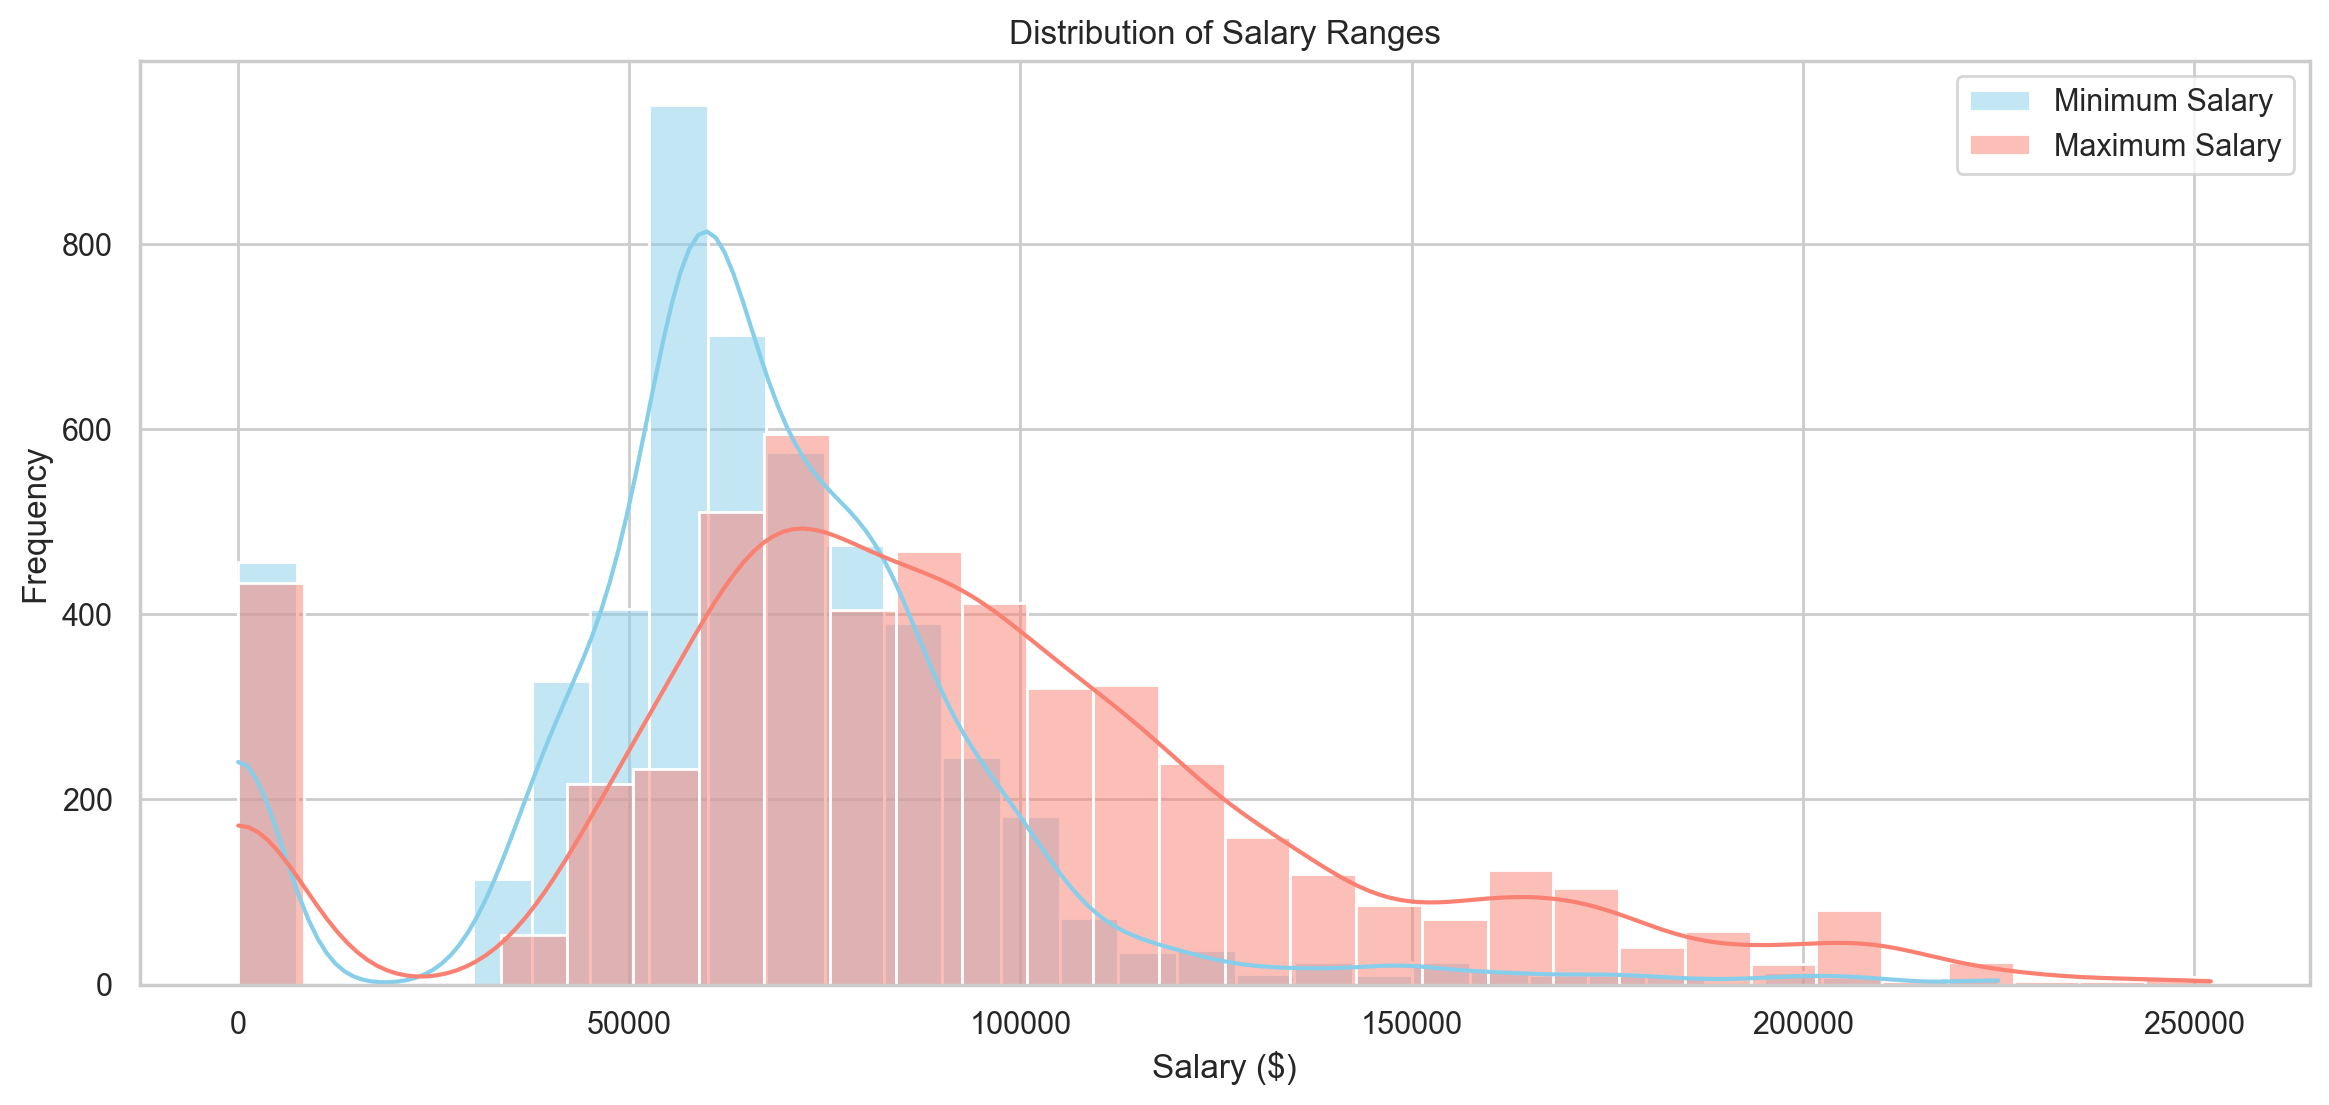

In [15]:
# Histogram of Minimum and Maximum Salary Ranges
plt.figure(figsize=(14, 6))
sns.histplot(df['Salary Range From'], bins=30, kde=True, color="skyblue", label="Minimum Salary")
sns.histplot(df['Salary Range To'], bins=30, kde=True, color="salmon", label="Maximum Salary")
plt.title('Distribution of Salary Ranges')
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# 2. Scatter Plot of Salary vs. Job Level
### Examining how the level (rank) of a position relates to minimum salary.

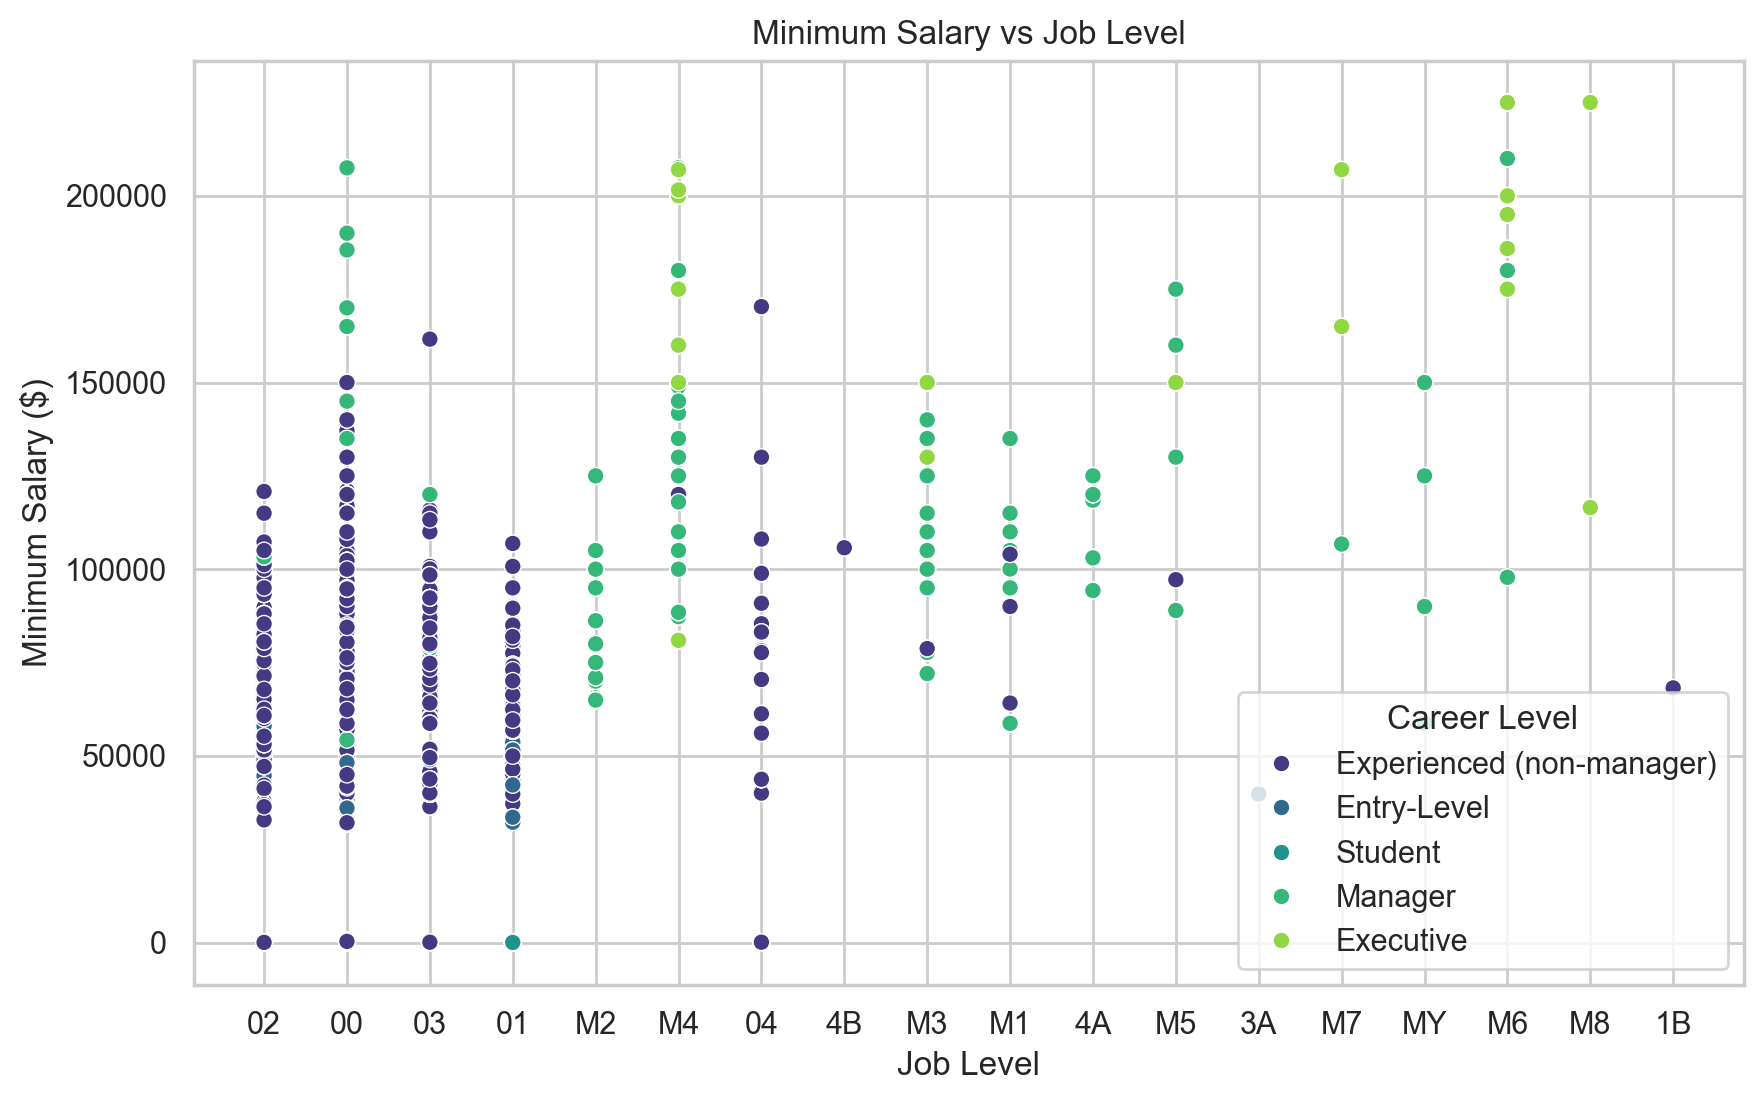

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Level', y='Salary Range From', hue='Career Level', palette="viridis")
plt.title('Minimum Salary vs Job Level')
plt.xlabel('Job Level')
plt.ylabel('Minimum Salary ($)')
plt.legend(title='Career Level')
plt.show()


<a id="eda"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Outlier Detection and Imputation</p>

⬆️ [Table of Contents](#contents_tabel)

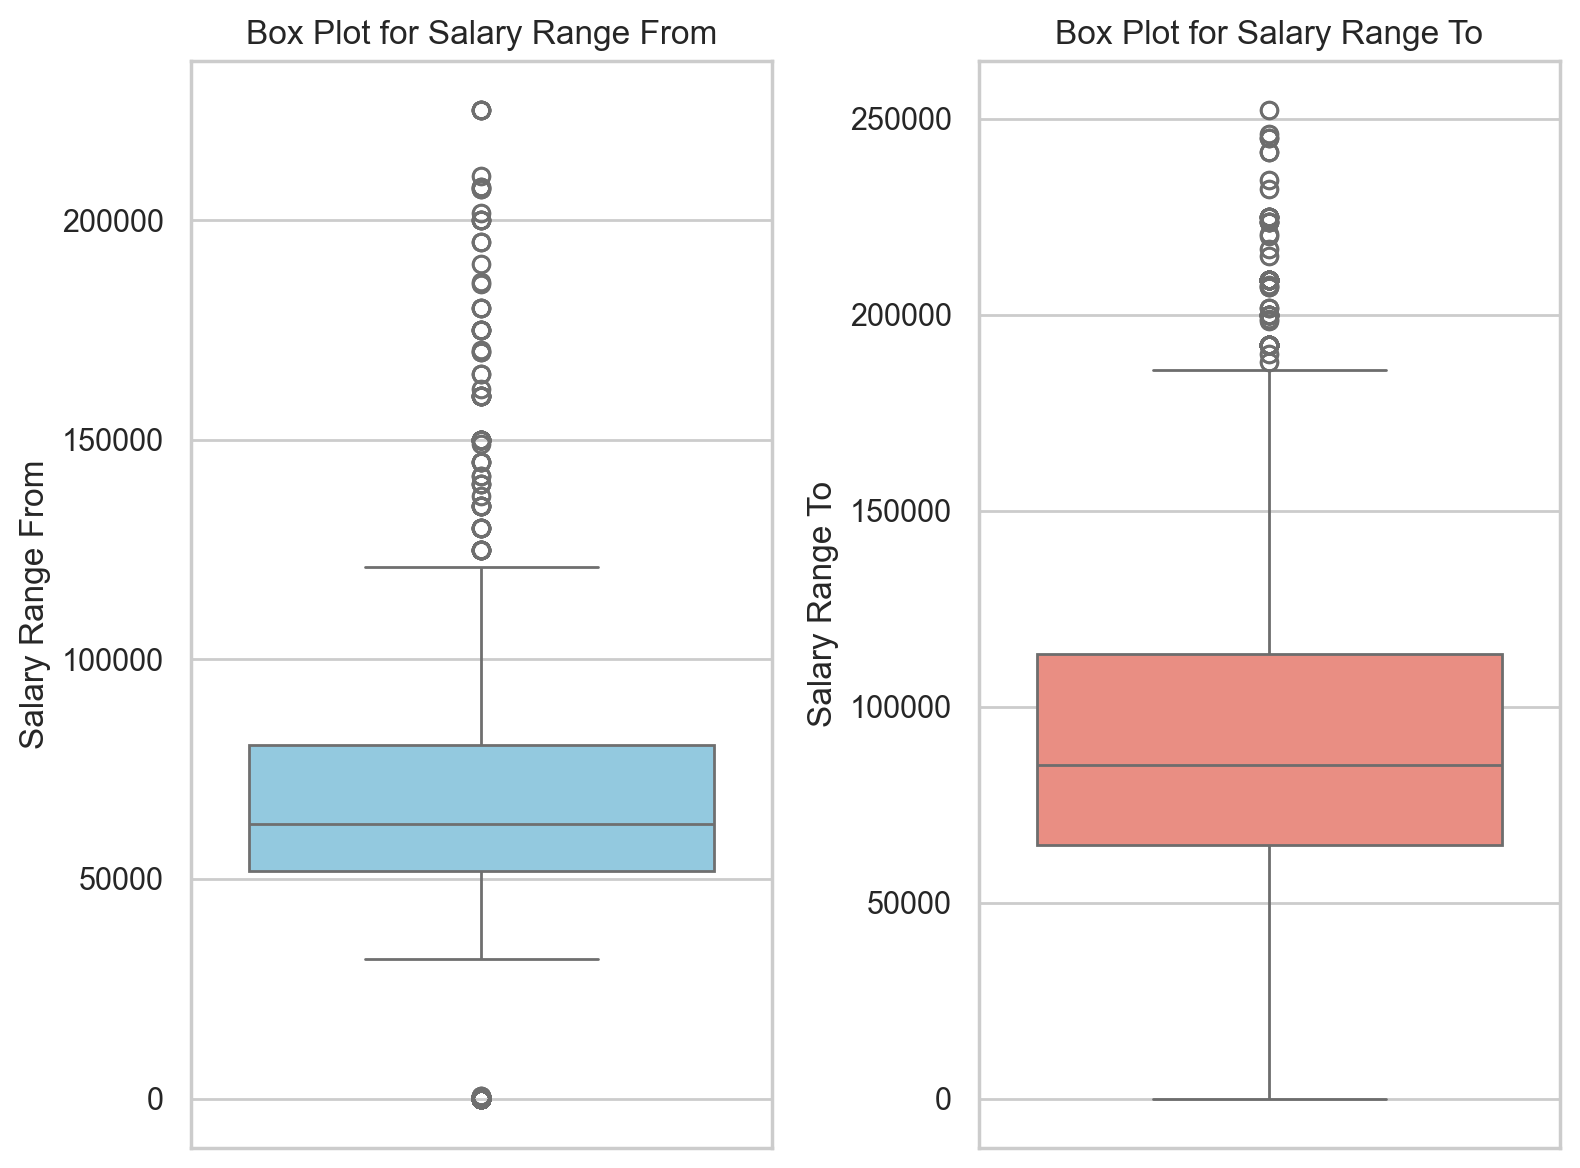

In [17]:
# Set plot style
sns.set(style="whitegrid")

# Plot box plots for each column to visualize outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=data, y='Salary Range From', color='skyblue')
plt.title('Box Plot for Salary Range From')
plt.ylabel('Salary Range From')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, y='Salary Range To', color='salmon')
plt.title('Box Plot for Salary Range To')
plt.ylabel('Salary Range To')

plt.tight_layout()
plt.show()

In [18]:
continuous_features

NameError: name 'continuous_features' is not defined

In [19]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified


NameError: name 'continuous_features' is not defined

In [20]:
def cap_outliers(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply capping to the salary columns
data = cap_outliers(data, 'Salary Range From')
data = cap_outliers(data, 'Salary Range To')


<a id="eda"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6  |  Feature Engineering</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="cat_statistics"></a>
# <b><span style='color:white'>Step 6.1 |</span><span style='color:brown'>  Create New Features</span></b>

In [21]:
data['Salary Midpoint'] = (data['Salary Range From'] + data['Salary Range To']) / 2


In [22]:
X = pd.get_dummies(data, columns=['Job Category', 'Full-Time/Part-Time indicator', 'Career Level'], drop_first=True)


<a id="eda"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7  |  Correlation Analysis</p>

⬆️ [Table of Contents](#contents_tabel)

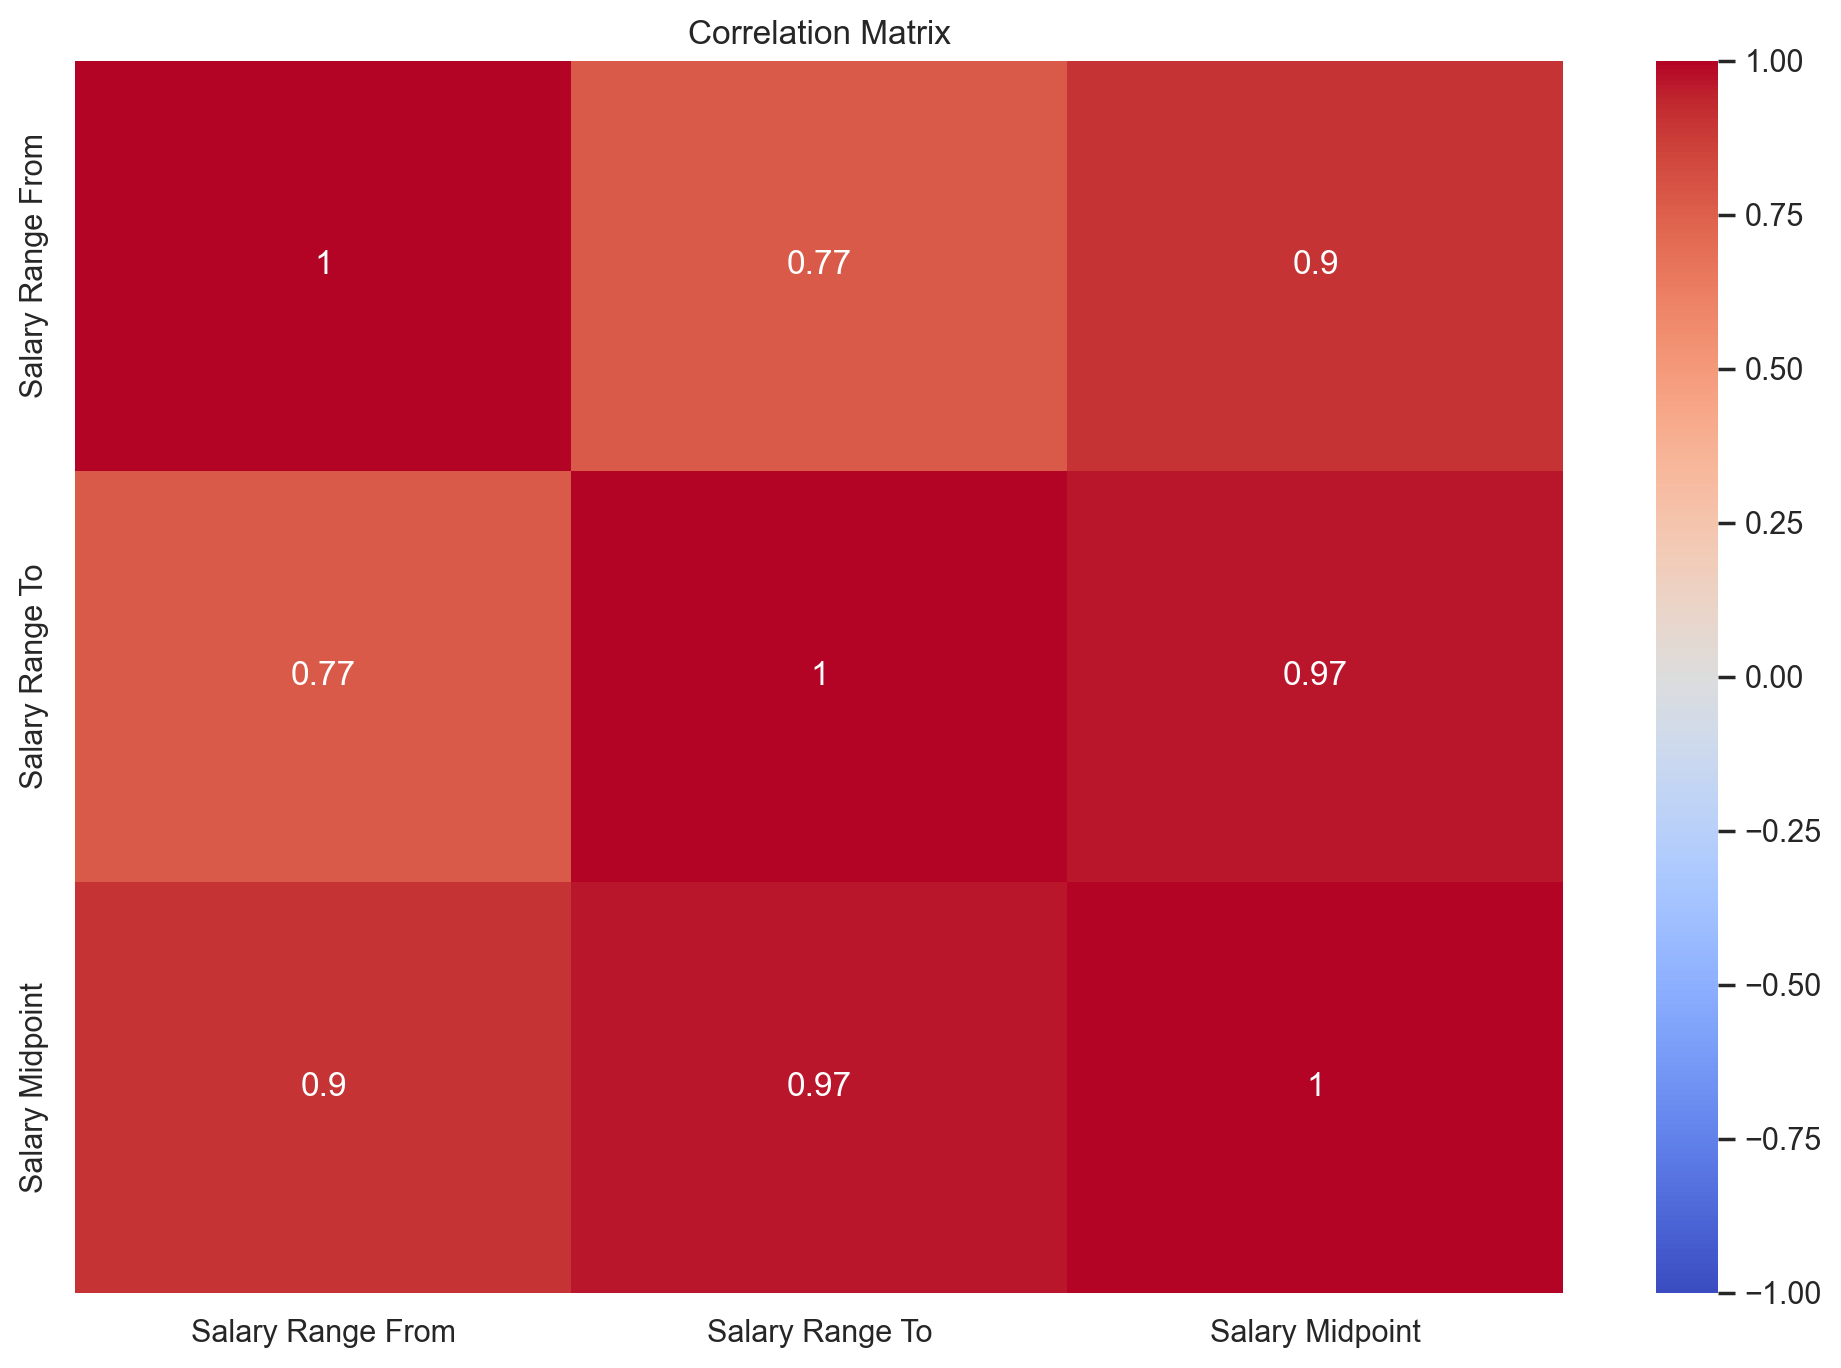

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[['Salary Range From', 'Salary Range To', 'Salary Midpoint']].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


<a id="eda"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8  | Prepare Data for Modeling</p>

⬆️ [Table of Contents](#contents_tabel)

In [24]:
# One-hot encode categorical columns in X
X = pd.get_dummies(X, drop_first=True)
y = data['Salary Midpoint'] 


In [25]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
print('x_train :' , X_train.shape)
print('x_test :' , X_test.shape)
print('y_train :' , y_train.shape)
print('y_test :' , y_test.shape)

x_train : (4096, 8280)
x_test : (1024, 8280)
y_train : (4096,)
y_test : (1024,)


<a id="dt"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | Decision Tree Model Building</p>


____
<a id="dt_base"></a>
# <b><span style='color:white'>Step 6.1 |</span><span style='color:brown'> DT Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: white;color:black; font-size:115%; text-align:left">

First, let's define the base DT model:

In [27]:
# Define the base DT model
# dt_base = DecisionTreeClassifier(random_state=42)

____
<a id="dt_hp"></a>
# <b><span style='color:white'>Step 6.2 |</span><span style='color:brown'> DT  Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: white;color:black; font-size:120%; text-align:left">

__🔍<span style="font-size:130%; color:brown"> Note: </span>__ In medical scenarios, especially in the context of diagnosing illnesses, it's often more important __to have a high recall (sensitivity) for the positive class (patients with the condition)__. A high recall ensures that most of the actual positive cases are correctly identified, even if it means some false positives (cases where healthy individuals are misclassified as having the condition). The rationale is that it's generally better to have a few false alarms than to miss out on diagnosing a patient with a potential illness.

In [28]:
# def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=5):
#     '''
#     This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
#     It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
#     The combination with the highest recall for class 1 is selected as the default scoring metric. 
#     The function returns the classifier with the optimal hyperparameters.
#     '''
    
#     # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
#     cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

#     # Create the GridSearchCV object
#     clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

#     # Fit the GridSearchCV object to the training data
#     clf_grid.fit(X_train, y_train)

#     # Get the best hyperparameters
#     best_hyperparameters = clf_grid.best_params_
    
#     # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
#     return clf_grid.best_estimator_, best_hyperparameters

<div style="border-radius:10px; padding: 15px; background-color: white;color:black; font-size:115%; text-align:left">

I'll set up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our DT model:

In [29]:
# # Hyperparameter grid for DT
# param_grid_dt = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [2,3,5],
#     'min_samples_split': [2, 3, 4,5],
#     'min_samples_leaf': [1, 2,3]
# }

In [30]:
# # Call the function for hyperparameter tuning
# best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

<a id="dt"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | Linear Regression Model Building</p>


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Linear Regression:
Mean Squared Error: 129569558.6074256
Root Mean Squared Error: 11382.862496201278
R-squared: 0.8779078452601787


<a id="dt"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 | Random Forest Model Building</p>


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize model and GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Best parameters and training the best model
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor:")
print("Best Parameters:", grid_search_rf.best_params_)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Random Forest Regressor:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error: 1475.495882241706
Root Mean Squared Error: 38.41218403373735
Mean Absolute Error: 11.62809232194046
R-squared: 0.9999986096543547


<a id="dt"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 | XGBoost Regressor with Hyperparameter Tuning</p>


In [33]:
from xgboost import XGBRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize model and GridSearchCV
xgb_model = XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

# Best parameters and training the best model
best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regressor:")
print("Best Parameters:", grid_search_xgb.best_params_)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


XGBoost Regressor:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
Mean Squared Error: 17330.0954496298
Root Mean Squared Error: 131.64382040046468
Mean Absolute Error: 60.082662120819094
R-squared: 0.9999836700169543


<a id="dt"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12 | Support Vector Regressor with Hyperparameter Tuning</p>


In [34]:



from sklearn.svm import SVR

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']
}

# Initialize model and GridSearchCV
svr_model = SVR()
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)

# Best parameters and training the best model
best_svr = grid_search_svr.best_estimator_
y_pred = best_svr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Support Vector Regressor:")
print("Best Parameters:", grid_search_svr.best_params_)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Support Vector Regressor:
Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error: 18769022.38094058
Root Mean Squared Error: 4332.322977449924
Mean Absolute Error: 1429.8310816606117
R-squared: 0.9823141298814486


<a id="conclusion"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 13 | Conclusion</p>


# Step 1: Adjust Evaluation Function to Include All Metrics6

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Define an evaluation function to store results for each model
def evaluate_model(model, X_test, y_test):
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Return results as a dataframe row
    return pd.DataFrame({
        'Model': [model.__class__.__name__],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae],
        'R²': [r2]
    })


# Step 2: Evaluate Each Model and Store Results

In [36]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_evaluation = evaluate_model(lr_model, X_test, y_test)

# Random Forest Regressor (using best parameters found via GridSearchCV or predefined)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_evaluation = evaluate_model(rf_model, X_test, y_test)

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_evaluation = evaluate_model(xgb_model, X_test, y_test)

# Support Vector Regressor
svr_model = SVR(C=1, epsilon=0.1, kernel='rbf')
svr_model.fit(X_train, y_train)
svr_evaluation = evaluate_model(svr_model, X_test, y_test)


# Step 3: Combine and Format Results

In [37]:
# Concatenate the evaluation dataframes
all_evaluations = [lr_evaluation, rf_evaluation, xgb_evaluation, svr_evaluation]
results = pd.concat(all_evaluations, ignore_index=True)

# Round values for readability
results = results.round(3)

# Display the final table
results


,Model,MSE,RMSE,MAE,R²
0,LinearRegression,1.295696e+08,11382.862,3538.393,0.878
1,RandomForestRegressor,1.963234e+03,44.308,16.041,1.000
2,XGBRegressor,2.945160e+04,171.615,92.326,1.000
3,SVR,1.061797e+09,32585.219,24935.226,-0.001
